In [26]:
from ccompletion.tokenizer import PythonTokenizer

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

sns.set(style='darkgrid')
sns.set(font_scale=1.5) # Increase the plot size and font size.
plt.rcParams["figure.figsize"] = (10,5)

tokenizer = PythonTokenizer(vocab_file='../vocab.bpe')

## Vocabulary Token Lengths

Below is the countplot of the subwords (excluding long tokens since they are rare).

Maximum token length: 611


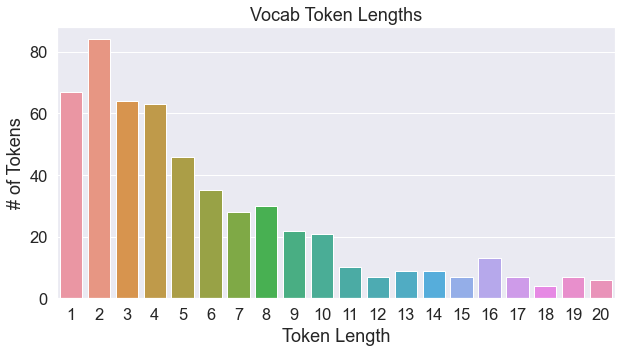

In [15]:
token_lengths = [len(token) for token in tokenizer.bpe.vocab()]
top_token_lengths = sorted(set(token_lengths))[:20]
filtered_token_lengths = [l for l in token_lengths if l in top_token_lengths]

sns.countplot(filtered_token_lengths)
plt.title('Vocab Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('# of Tokens')

print('Maximum token length:', max(token_lengths))

## Subword vs initial word comparison

In [54]:
vocab_size = tokenizer.bpe.vocab_size()
initial_words = [token for token in tokenizer.bpe.vocab() if re.match(r'^▁\d+\|\|.+$', token)]
initial_words_count = len(initial_words)
subwords_count = vocab_size - initial_words_count
prcnt = float(subwords_count) / vocab_size

print(f'Number of subwords: {subwords_count} of {vocab_size}')
print(f'Initial words Percentage: {1 - prcnt:.4%}')
print(f'Subwords Percentage: {prcnt:.4%}')

Number of subwords: 732 of 861
Initial words Percentage: 14.9826%
Subwords Percentage: 85.0174%
